In [18]:
from pytrends.request import TrendReq
import pandas as pd
from IPython.display import SVG, display
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt



keyword = ['Bitcoin cash', 'EOS', 'ETH', 'LTC']
pytrend = TrendReq(hl='en-US')

pytrend.build_payload(kw_list=keyword, timeframe='today 3-m', geo='')#, gprop='news')

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df

interest_over_time_df.plot.line()
plt.show()

In [15]:


py.sign_in('szong', '6xfo8h25L7Ndx4v0VORZ')

def df_scatter(df, title, separate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))

    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels=not separate_y_axis,
            type=scale
        )
    )

    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale)

    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'

    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index,
            y=series,
            name=label_arr[index],
            visible=visibility
        )

        # Add seperate axis for the series
        if separate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    return fig
    

fig = df_scatter(interest_over_time_df[[keyword]], title='Interest for Bitcoin by Day the Last Month in Switzerland')
py.image.ishow(fig)

TypeError: unhashable type: 'list'

In [24]:
interest_by_region_df = pytrend.interest_by_region().reset_index()
print(interest_by_region_df.head())


      geoName  genome
0     Alabama      45
1      Alaska      37
2     Arizona      41
3    Arkansas      44
4  California      62


      geoName  genome
0     Alabama      45
1      Alaska      37
2     Arizona      41
3    Arkansas      44
4  California      62


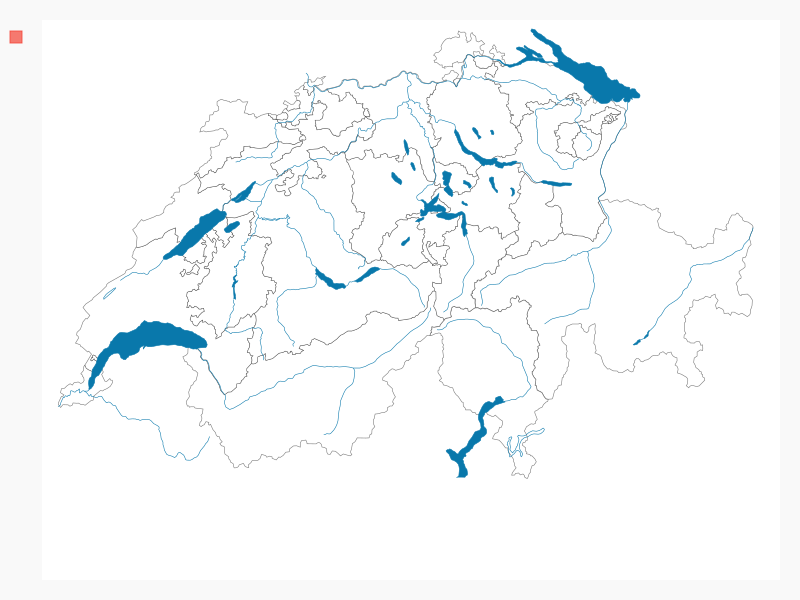

In [25]:
%matplotlib inline
from IPython.display import HTML, display
import pygal #http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_ch.html

    
def map_swiss(title, values):
    ch_chart = pygal.maps.ch.Cantons()
    ch_chart.add(values=values, title=title)
    '''workaround to plot inline on ipython: save as png and render it inline'''
#     rendered_ch_chart = ch_chart.render_to_png('images/gtrends-swissmap.png')
    rendered_ch_chart = ch_chart.render_to_file('/home/szong/projects/development/notebooks/gtrends-swissmap.svg')

    
interest_by_region_df = pytrend.interest_by_region().reset_index()
print(interest_by_region_df.head())

cantons = pd.read_csv('/home/szong/Downloads/cantons.csv', sep='\t') # pygal canton code  german canton name mapping
interest_by_region_df = pd.merge(interest_by_region_df, cantons, left_on='geoName', right_on='Name_DE', how='left')

res = {}
for index, row in interest_by_region_df.iterrows():
    res[row['code']] = row[keyword]

rendered_ch_chart = map_swiss('', res)
display(SVG('/home/szong/projects/development/notebooks/gtrends-swissmap.svg'))

In [42]:
import pygal # First import

bar_chart = pygal.Bar() # Then create a

bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]) # Add some values
bar_chart.render_to_file('bar_chart.svg') # Save the svg to


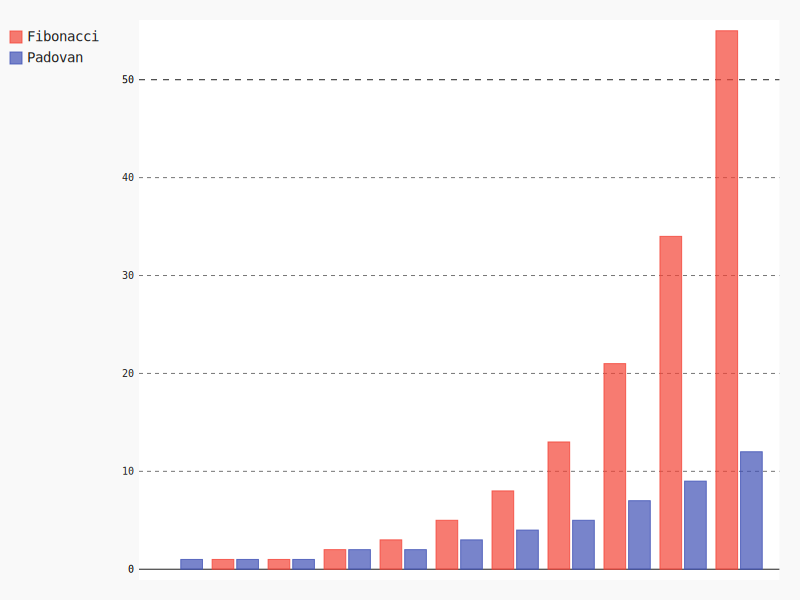

In [60]:
bar_chart = pygal.Bar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
bar_chart.render_to_file('bar_chart.svg')
display(SVG('/home/szong/projects/development/notebooks/bar_chart.svg'))

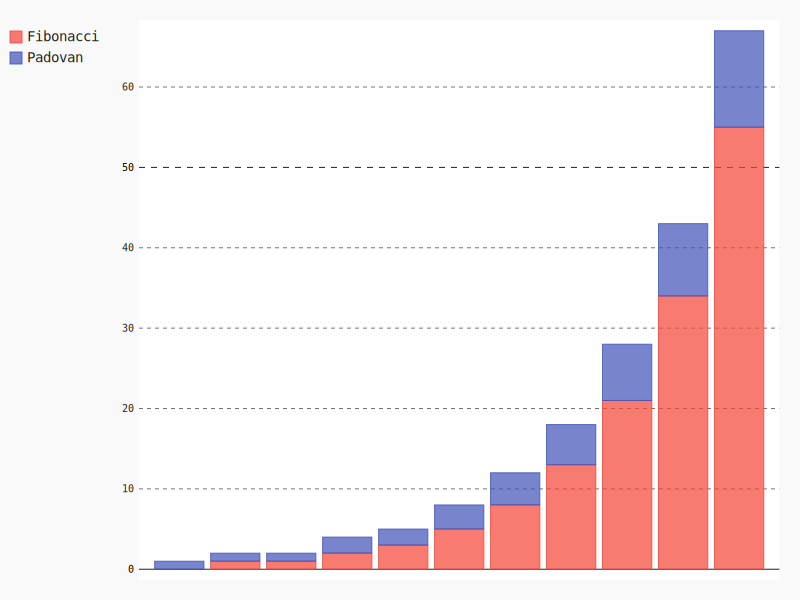

In [63]:
bar_chart = pygal.StackedBar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
display(SVG(bar_chart.render()))

In [61]:

# def show_svg():
#     display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))
# show_svg()

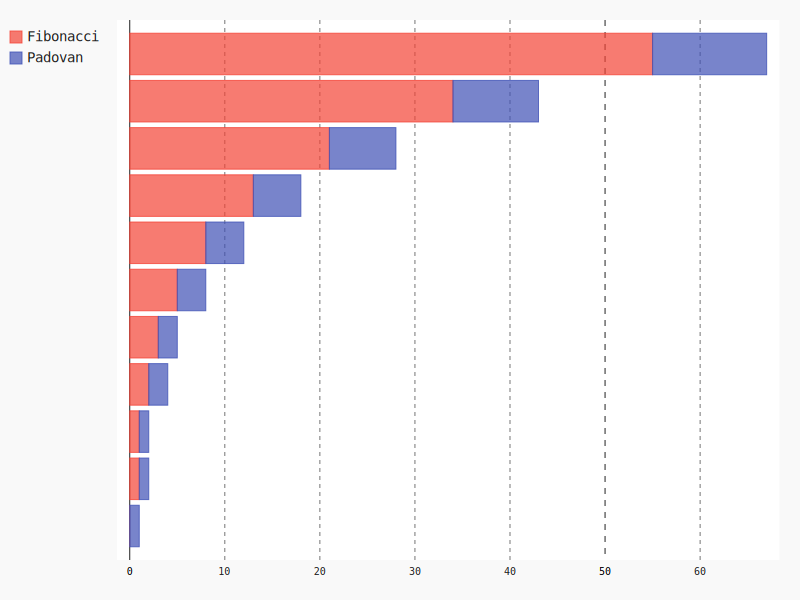

In [64]:
bar_chart = pygal.HorizontalStackedBar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
display(SVG(bar_chart.render()))

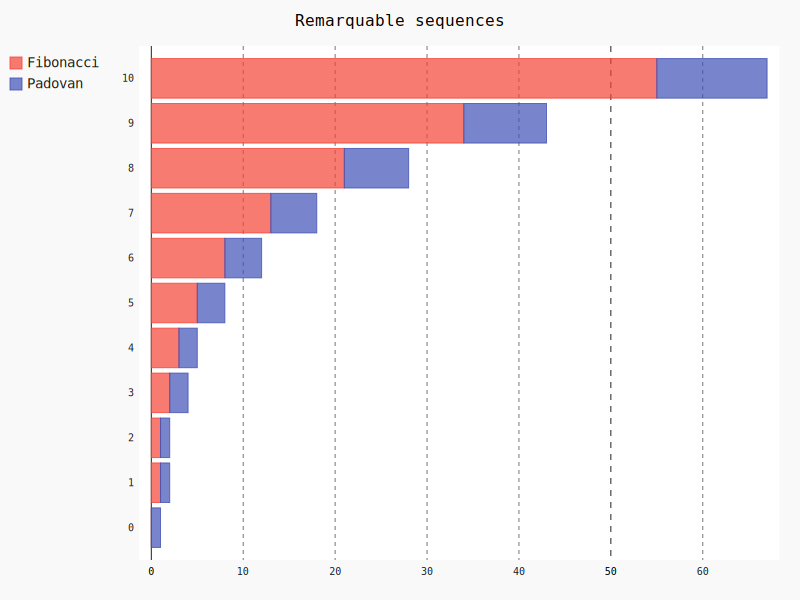

In [65]:
bar_chart = pygal.HorizontalStackedBar()
bar_chart.title = "Remarquable sequences"
bar_chart.x_labels = map(str, range(11))
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])
bar_chart.add('Padovan', [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12])
display(SVG(bar_chart.render()))

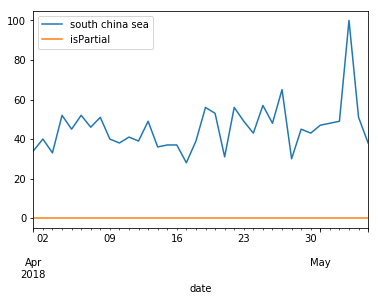

In [75]:
import pandas as pd
from pytrends.request import TrendReq 
import datetime as dt
import math

#### connect to google
_pytrends = TrendReq(hl='en-US', tz=360)
#### build the playload
_kw_list = ['south china sea']#, 'Valeant pharmaceuticals International', 'Bausch Health']
_cat = 0
_geo = ''
_gprop = '' 
# dates can be formated as  `2017-12-07 2018-01-07`, or  `today 3-m` `today 5-y`  check trends.google.com's url
_date_fmt = '%Y-%m-%d'
_start_date, _end_date = map(lambda x : dt.datetime.strptime(x, _date_fmt)
                           , ['2018-04-01', '2018-05-08'])

### Building an array of 90d periods to retreive google trend data with a one day resolution
_90d_periods = math.ceil( (_end_date - _start_date) / dt.timedelta(days=90) ) 

# _tmp_range is a list of dates separated by 90d.  We need one more than the number of _90_periods.  if _end_date is in the future google returns the most recent data
_tmp_range = pd.date_range(start= _start_date, periods= _90d_periods + 1, freq= '90D')

# making the list of `_start_date _end_date`, strf separated by a space
_rolling_dates = [ ' '.join(map(lambda x : x.strftime(_date_fmt)
                                , [_tmp_range[i], _tmp_range[i+1] ])
                            )
                    for i in range(len(_tmp_range)-1) ]

# initialization of the major data frame _df_trends
# _dates will contains our last playload argument
_dates = _rolling_dates[0]
_pytrends.build_payload(_kw_list, cat=_cat, timeframe=_dates, geo=_geo, gprop=_gprop)
_df_trends= _pytrends.interest_over_time()

for _dates in _rolling_dates[1:] :
    # we need to normalize data before concatanation
    _common_date = _dates.split(' ')[0]
    _pytrends.build_payload(_kw_list, cat=_cat, timeframe=_dates, geo=_geo, gprop=_gprop)
    _tmp_df =   _pytrends.interest_over_time()
    _multiplication_factor = _df_trends.loc[_common_date] / _tmp_df.loc[_common_date]

    _df_trends= (pd.concat([_df_trends,
                           (_tmp_df[1:]* _multiplication_factor)])
                 .drop(labels = 'isPartial', axis = 1)  # isPartial usefull ?
                 .resample('D', closed='right').bfill()  # making sure that we have one value per day. 
                )
# _df_trends contains the normalised trends

_df_trends.plot()

          mid          title                             type  value
0   /m/0cqt90   Donald Trump              45th U.S. President    100
1    /m/05jhg           News                            Topic     15
2  /m/0289n8t        Twitter        Social networking service     11
3   /m/04hfnv  Melania Trump  First Lady of the United States     10
4    /m/06vbd          Syria       Country in the Middle East      6


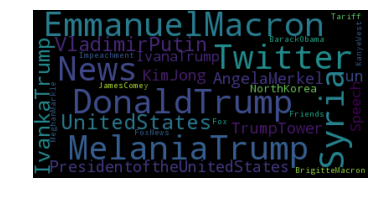

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud #https://github.com/amueller/word_cloud
# keyword = 'Bitcoin'

def plot_wordcloud(wordlist):
    text = ' '.join([w.replace(' ', '') for w in wordlist])
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

related_topics_df = pytrend.related_topics()[keyword]
print(related_topics_df.head())
plot_wordcloud(related_topics_df['title'].tolist())